In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

## Pull in data from Johns Hopkins CSSE (https://github.com/CSSEGISandData/COVID-19)

In [3]:
data_1 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
data_2 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
data = data_1.append(data_2)

In [4]:
def deathsByCountry(countryNames, filters=None, byNthDeath=1):
    results = [deathsByCountrySingle(countryName, filters, byNthDeath) for countryName in countryNames]
    return pd.concat(results, axis=1)

In [5]:
#compare by date of first death
def renormalizeByDaysSinceNthDeath(df, name, deathCount=1, suffix='-Total'):
    startIndex = df.index[df[name + suffix] >= deathCount].tolist()[0]
    firstDeathIndex = df.index.get_loc(startIndex)
    df2 = df.reset_index()
    values = df2.index.values
    columnName = 'days-since-death-{0}'.format(deathCount)
    df2[columnName] = values
    df2[columnName] = df2[columnName] - firstDeathIndex
    df2 = df2[df2[columnName] > -1].set_index(columnName)
    return df2

In [6]:
def deathsByCountrySingle(countryName, filters=None, byNthDeath=1):
    #can either get data for the whole country - or just a specific region
    if 'province' in countryName:
        totalDeaths = data.loc[(data['Country/Region'] == countryName['country']) & (data['Province/State'] == countryName['province'])]
        name = countryName['country'] + '-' + countryName['province']
    else: 
        totalDeaths = data.loc[(data['Country/Region'] == countryName) & (pd.isna(data['Province/State']))]
        name = countryName
    #transpose so the we have rows by date - and drop the geolocation/labels we don't need
    transposed = totalDeaths.T.drop(axis=0, labels=['Lat', 'Long', 'Province/State', 'Country/Region'])
    rename_totals = transposed.rename(columns={transposed.columns.values[0]: name + '-Total'}).astype({name + '-Total': 'int32'})
    df = pd.DataFrame()
    if (byNthDeath > 0):
        byNth = renormalizeByDaysSinceNthDeath(rename_totals, name, byNthDeath)
        df[name + '-Total'] = byNth[name + '-Total']
    else:
        df[name + '-Total'] = rename_totals[name + '-Total']
    singleDayTally = df.diff()     
    df[name + '-dailyDeaths'] = singleDayTally
    #percentage increase in deaths since yesterday
    percChange = df[name + '-dailyDeaths'].shift(-1)/df[name + '-Total']
    #inverse of rolling average of % change in deaths - approximation of how many days until death count doubles
    df[name + '-deaths-double-time(days)'] = 1/percChange.rolling(window=3).mean().shift(1)
    if (filters is None):
        return df
    return df[name + '-' + filters]

In [7]:
regionsToCompare = ['US', 
                      {'country': 'US', 'province': 'New York'}, 
                      'Spain', 
                      'Italy', 
                      'Iran', 
                      'United Kingdom', 
                      {'country': 'China', 'province': 'Hubei'}]

## Death totals by country/region by since 1/22

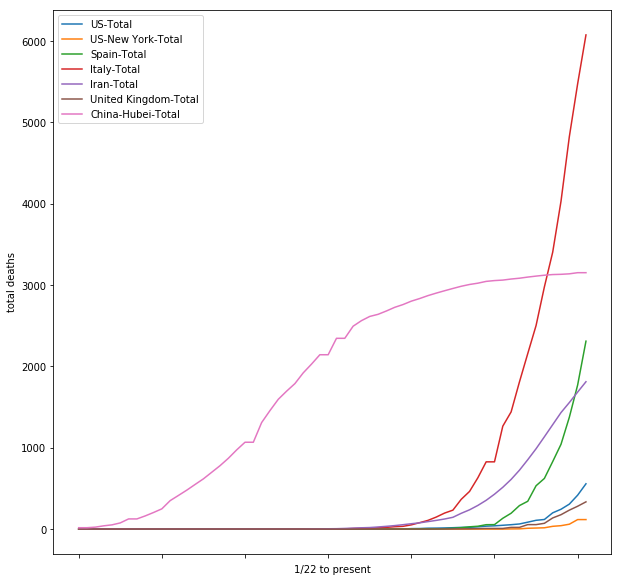

In [8]:
plot = deathsByCountry(regionsToCompare, 'Total', False).plot(kind='line')
plot.set_ylabel("total deaths")
plot.set_xlabel("1/22 to present")
plot

In [9]:
deathsByCountry(regionsToCompare, 'Total', False)

,US-Total,US-New York-Total,Spain-Total,Italy-Total,Iran-Total,United Kingdom-Total,China-Hubei-Total
1/22/20,0,0,0,0,0,0,17
1/23/20,0,0,0,0,0,0,17
1/24/20,0,0,0,0,0,0,24
1/25/20,0,0,0,0,0,0,40
1/26/20,0,0,0,0,0,0,52
1/27/20,0,0,0,0,0,0,76
1/28/20,0,0,0,0,0,0,125
1/29/20,0,0,0,0,0,0,125
1/30/20,0,0,0,0,0,0,162
1/31/20,0,0,0,0,0,0,204


## Same as above, but instead looking at days since 10th death on x-axis

*Note that Hubei started with 17 deaths at the start of this dateset so it's shifted a bit to the left

Text(0, 0.5, 'total deaths')

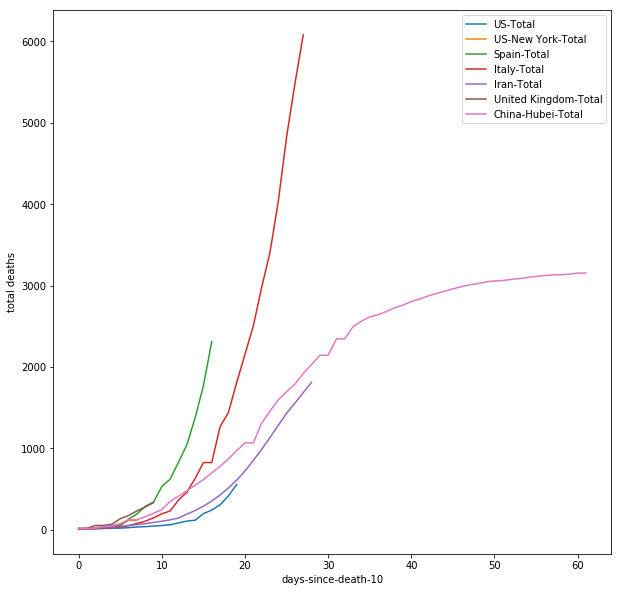

In [10]:
totalsPlot = deathsByCountry(regionsToCompare, 'Total', 10).plot(kind='line')
totalsPlot.set_ylabel("total deaths")

In [11]:
deathsByCountry(regionsToCompare, 'Total', 10).head(40)

,US-Total,US-New York-Total,Spain-Total,Italy-Total,Iran-Total,United Kingdom-Total,China-Hubei-Total
days-since-death-10,,,,,,,
0,11.0,10.0,10.0,10.0,12.0,21.0,17
1,12.0,13.0,17.0,12.0,16.0,21.0,17
2,14.0,16.0,28.0,17.0,19.0,55.0,24
3,17.0,34.0,35.0,21.0,26.0,55.0,40
4,21.0,42.0,54.0,29.0,34.0,71.0,52
5,22.0,60.0,55.0,34.0,43.0,137.0,76
6,28.0,117.0,133.0,52.0,54.0,177.0,125
7,36.0,117.0,195.0,79.0,66.0,233.0,125
8,40.0,NaN,289.0,107.0,77.0,281.0,162


## Based on 3 day running average - number of days until death total to double

This is where I'd like to note that the assumption implicitly made here: https://finance.yahoo.com/news/hell-coming-mathematical-proof-185019616.html that the total number of deaths (and thus total infections) doubling roughly every 3 days seems to break down when looking at trends from other countries.
We can see that in every country/region the time to double in days does not hold steady - in every case (even in Italy) time to double rises over time. 

In [12]:
deathsByCountry(countryNames=regionsToCompare, filters='deaths-double-time(days)', byNthDeath=10).head(40)

,US-deaths-double-time(days),US-New York-deaths-double-time(days),Spain-deaths-double-time(days),Italy-deaths-double-time(days),Iran-deaths-double-time(days),United Kingdom-deaths-double-time(days),China-Hubei-deaths-double-time(days)
days-since-death-10,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.357798,1.811847,1.878453,3.521289,3.373613,1.852941,2.781818
4,4.868182,1.885531,2.083455,2.904407,3.473777,1.570716,2.176387
5,6.033803,1.677041,3.697424,3.803919,3.188710,2.458036,2.100539
6,5.399175,1.858891,1.515490,2.770651,3.622260,1.983527,2.133295
7,4.950000,2.176166,1.576569,2.456889,4.039087,1.950671,2.711802
8,4.480603,NaN,1.267749,2.138164,4.653307,3.683858,3.188990


## Number of deaths by country/region since day that region had 10th death

Text(0, 0.5, 'total deaths')

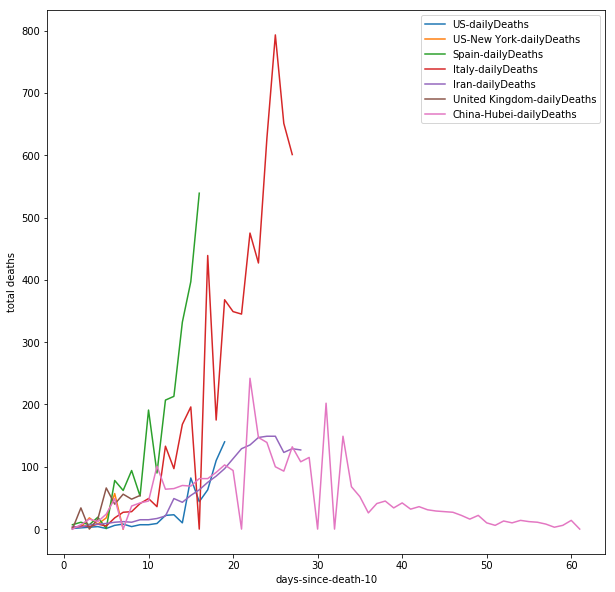

In [13]:
deathsByCountry(regionsToCompare, 'dailyDeaths', 10).plot(kind='line').set_ylabel("total deaths")

Feel free to use this as a starter for your own analysis